# Group Assignment. Exploratory Data Analysis

In this assignment, we will focus on exploratory data analysis of stock prices. Keep in mind, this assignment is just meant to practice your pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is challenging and you have to look things up on your own to try to solve the tasks issued. **
____
We'll focus on tech stocks and see how they progressed in the year of 2023. You may look at other sectors as well in the end of this notebook, such as Airline companies and retail industry.

To submit the assignment you can download the completed assignment in the **.ipynb** format **as well as** the **.pdf** from the notebook (go to File->Download as) and upload the same on Canvas. If someone is not able to upload the file in .ipynb format or .pdf, please upload the .html version.

# Part 1


## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo! Finance's API.

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install yfinance for this to work!](https://github.com/ranaroussi/yfinance) Use this link for install guidance (**pip install yfinance**).*

### The Imports

You need to install pandas yfinance first. You may comment out the first line in the following cell to install the module or use the command line and run the following command:

python3 -m pip install yfinance

The -m tells it to install the module.


In [37]:
!pip install yfinance
import yfinance as yf

In [38]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like

import datetime
%matplotlib inline

## Data

We need to get data using Yahoo Finance API. We will get stock information for the following companies:
* Amazon
* Meta
* Alphabet
* Microsoft
* Apple


Figure out how to get the stock data from Jan. 1st 2023 to Dec. 31st 2023 for each of these companies. Set each company to be a separate dataframe, with the variable name for that company being its ticker symbol. This will involve a few steps:
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each company.
2. Figure out how to use datareader to grab info on the stock.

Use [this documentation page](https://pypi.org/project/yfinance/) for hints and instructions


In [39]:
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)

In [40]:
# Amazon
Amazon = yf.download("AMZN", start, end)

# Meta
Meta = yf.download("META", start, end)

# Alphabet
Alphabet = yf.download("GOOG", start, end)

# Microsoft
Microsoft = yf.download("MSFT", start, end)

# Apple
Apple = yf.download("AAPL", start, end)

C:\Users\Tuong\AppData\Local\Temp\ipykernel_2696\3984462399.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Amazon = yf.download("AMZN", start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\Tuong\AppData\Local\Temp\ipykernel_2696\3984462399.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Meta = yf.download("META", start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\Tuong\AppData\Local\Temp\ipykernel_2696\3984462399.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Alphabet = yf.download("GOOG", start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\Tuong\AppData\Local\Temp\ipykernel_2696\3984462399.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Microsoft = yf.download("MSFT", start, end)
[*********************100%***************

In [41]:
Amazon.reset_index(inplace=True)
Meta.reset_index(inplace=True)
Alphabet.reset_index(inplace=True)
Microsoft.reset_index(inplace=True)
Apple.reset_index(inplace=True)

In [42]:
Amazon.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN
0,2023-01-03,85.820000,86.959999,84.209999,85.459999,76706000
1,2023-01-04,85.139999,86.980003,83.360001,86.550003,68885100
2,2023-01-05,83.120003,85.419998,83.070000,85.330002,67930800
3,2023-01-06,86.080002,86.400002,81.430000,83.029999,83303400
4,2023-01-09,87.360001,89.480003,87.080002,87.459999,65266100


##### Add a Column_Company Name (this is filled out for you)

In [43]:
Amazon["Company"]='Amazon'
Meta["Company"]='Meta'
Microsoft["Company"]='Microsoft'
Apple["Company"]='Apple'
Alphabet["Company"]='Alphabet'

#### Alternatively

You may download the datasets from Canvas and then import them in this notebook.

In [44]:
'''Amazon = pd.read_csv("Amazon.csv")

Meta = pd.read_csv("Meta.csv")

Microsoft = pd.read_csv("Microsoft.csv")

Apple = pd.read_csv("Apple.csv")

Alphabet = pd.read_csv("Alphabet.csv")'''

'Amazon = pd.read_csv("Amazon.csv")\n\nMeta = pd.read_csv("Meta.csv")\n\nMicrosoft = pd.read_csv("Microsoft.csv")\n\nApple = pd.read_csv("Apple.csv")\n\nAlphabet = pd.read_csv("Alphabet.csv")'

##### Append all the data sets - these five tables

In [45]:
# your code here

prices=Amazon.copy()

prices=pd.merge(prices,Microsoft,how='inner',on='Date',suffixes=('_AMZN','_MSFT'))
prices=pd.merge(prices,Meta,how='inner',on='Date',suffixes=('_MSFT','_META'))
prices=pd.merge(prices,Alphabet,how='inner',on='Date',suffixes=('_META','_GOOG'))
prices=pd.merge(prices,Apple,how='inner',on='Date',suffixes=('_META','_GOOG'))

prices.head()




C:\Users\Tuong\AppData\Local\Temp\ipykernel_2696\175693666.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  prices=pd.merge(prices,Microsoft,how='inner',on='Date',suffixes=('_AMZN','_MSFT'))
C:\Users\Tuong\AppData\Local\Temp\ipykernel_2696\175693666.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  prices=pd.merge(prices,Meta,how='inner',on='Date',suffixes=('_MSFT','_META'))
C:\Users\Tuong\AppData\Local\Temp\ipykernel_2696\175693666.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  prices=pd.merge(prices,Alphabet,how='inner',on='Date',suffixes=('_META','_GOOG'))
C:\Users\Tuong\AppData\Local\Temp\ipykernel_2696\175693666.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  prices=pd.merge(prices,Apple,how='inner',on='Date

Price,Date,Close,High,Low,Open,Volume,Company_AMZN,Close,High,Low,Open,Volume,Company_MSFT,Close,High,Low,Open,Volume,Company_META,Close,High,Low,Open,Volume,Company_GOOG,Close,High,Low,Open,Volume,Company
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN,,MSFT,MSFT,MSFT,MSFT,MSFT,,META,META,META,META,META,,GOOG,GOOG,GOOG,GOOG,GOOG,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2023-01-03,85.820000,86.959999,84.209999,85.459999,76706000,Amazon,234.423569,240.460771,232.290481,237.848239,25740000,Microsoft,123.975723,125.595741,121.530796,122.067489,35528500,Meta,89.090324,90.927756,88.414946,89.219446,20738500,Alphabet,123.330643,129.079559,122.443158,128.468186,112117500,Apple
1,2023-01-04,85.139999,86.980003,83.360001,86.550003,68885100,Amazon,224.169159,227.858008,221.096741,227.280710,50623400,Microsoft,126.589607,128.259314,125.078916,126.599541,32397100,Meta,88.107063,90.619866,87.203252,90.391434,27046500,Alphabet,124.602699,126.870716,123.340502,125.125327,89113600,Apple
2,2023-01-05,83.120003,85.419998,83.070000,85.330002,67930800,Amazon,217.525299,222.652526,216.987134,222.310053,39585600,Microsoft,126.162254,127.732576,123.776957,125.357212,25447100,Meta,86.180244,87.610460,85.971673,87.471412,23136100,Alphabet,123.281342,125.993097,123.024963,125.361998,80962700,Apple
3,2023-01-06,86.080002,86.400002,81.430000,83.029999,83303400,Amazon,220.088867,220.901005,214.628978,218.200413,43613600,Microsoft,129.223373,129.531472,125.267755,128.179804,27584500,Meta,87.560806,87.868697,84.988406,86.766241,26612600,Alphabet,127.817352,128.478033,123.153137,124.257564,87754700,Apple
4,2023-01-09,87.360001,89.480003,87.080002,87.459999,65266100,Amazon,222.231750,226.263087,221.537040,221.576173,27369800,Microsoft,128.676727,132.135401,128.487889,130.356375,26649100,Meta,88.196442,90.212643,87.977936,88.588754,22996700,Alphabet,128.340012,131.554685,128.083633,128.655569,70790800,Apple


##### Derive the average closing price for each company

In [46]:
# your code here
avg_cost=prices['Close'].mean()
print(avg_cost)

Ticker
AMZN    121.372800
MSFT    308.715738
META    259.822550
GOOG    118.798889
AAPL    170.676108
dtype: float64


##### What is the max close price for each company's stock throughout the time period?

In [47]:
# your code 
max_cost=prices['Close'].max()
print(max_cost)

Ticker
AMZN    154.070007
MSFT    377.783630
META    356.124634
GOOG    141.849319
AAPL    196.446823
dtype: float64


##### Create a new dataframe called returns. This dataframe will contain the returns for each company's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

##### We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().

In [48]:
returns = pd.DataFrame(prices.groupby('Company')['Close'].pct_change())
print(returns)

Price      Close                                        
Ticker      AMZN      MSFT      META      GOOG      AAPL
0            NaN       NaN       NaN       NaN       NaN
1      -0.007924 -0.043743  0.021084 -0.011037  0.010314
2      -0.023726 -0.029638 -0.003376 -0.021869 -0.010605
3       0.035611  0.011785  0.024263  0.016019  0.036794
4       0.014870  0.009736 -0.004230  0.007259  0.004089
..           ...       ...       ...       ...       ...
245    -0.002730  0.002784 -0.001977  0.006488 -0.005548
246    -0.000065  0.000214  0.004075  0.000701 -0.002841
247    -0.000456 -0.001575  0.008455 -0.009663  0.000518
248     0.000261  0.003235  0.001369 -0.001131  0.002226
249    -0.009388  0.002025 -0.012168 -0.002477 -0.005424

[250 rows x 5 columns]


##### Using this returns dataframe, figure out on what dates each company stock had the best and worst single day returns. Did anything significant happen that day?

In [ ]:
best = returns.idxmax()
worst = returns.idxmin()
print(best)
print(worst)
print('')

Price  Ticker
Close  AMZN      147
       MSFT       78
       META       21
       GOOG       21
       AAPL       85
dtype: int64
Price  Ticker
Close  AMZN       22
       MSFT        1
       META       51
       GOOG      204
       AAPL      147
dtype: int64


##### Please state here what you have noticed. Did anything significant happen in that time frame? 

##### Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? 

In [55]:
#  your code here
print(returns.std())
print('Meta was the riskiest stock, having the highest standard deviation.')


Price  Ticker
Close  AMZN      0.020805
       MSFT      0.015824
       META      0.025090
       GOOG      0.019283
       AAPL      0.012570
dtype: float64
Meta was the riskiest stock, having the highest standard deviation.


##### Which company would you classify as the riskiest for each year? 

In [51]:
# your code here


##### Moving Averages

##### Please derive the moving averages for these stocks in the year 2022. Use .rolling() in pandas to get the rolling average calculation. 



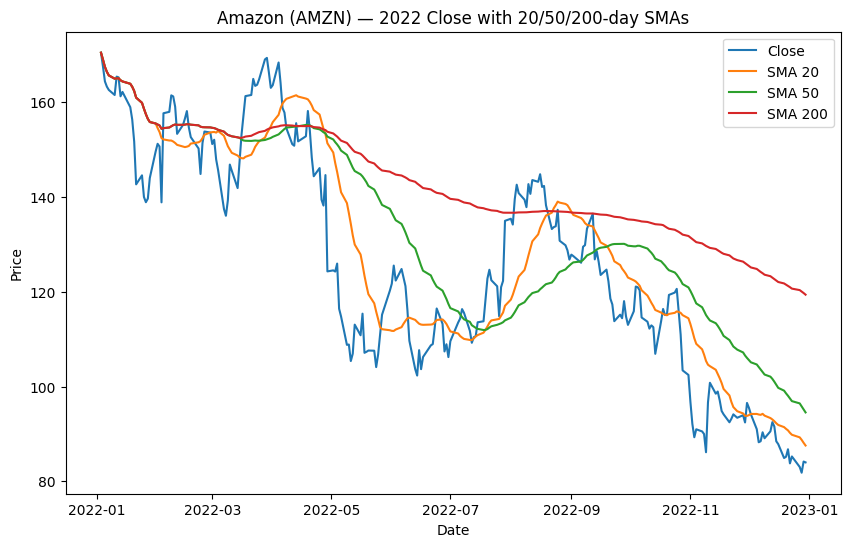

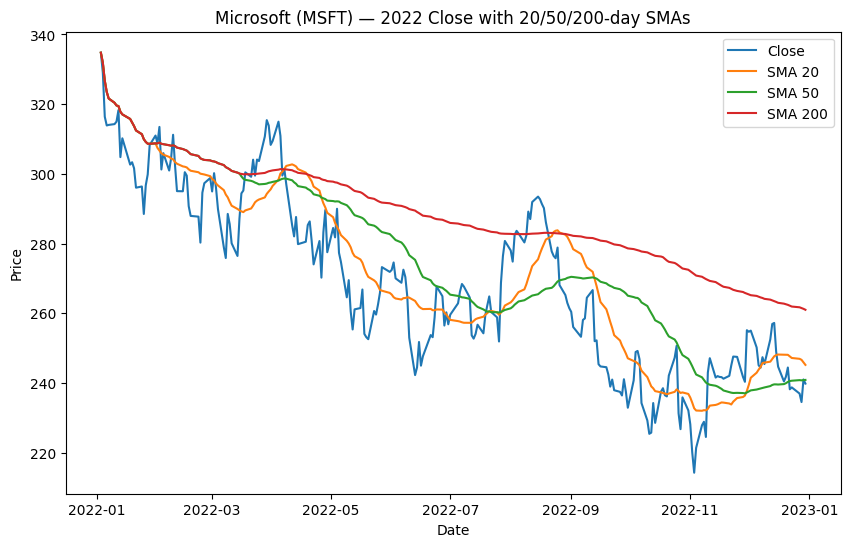

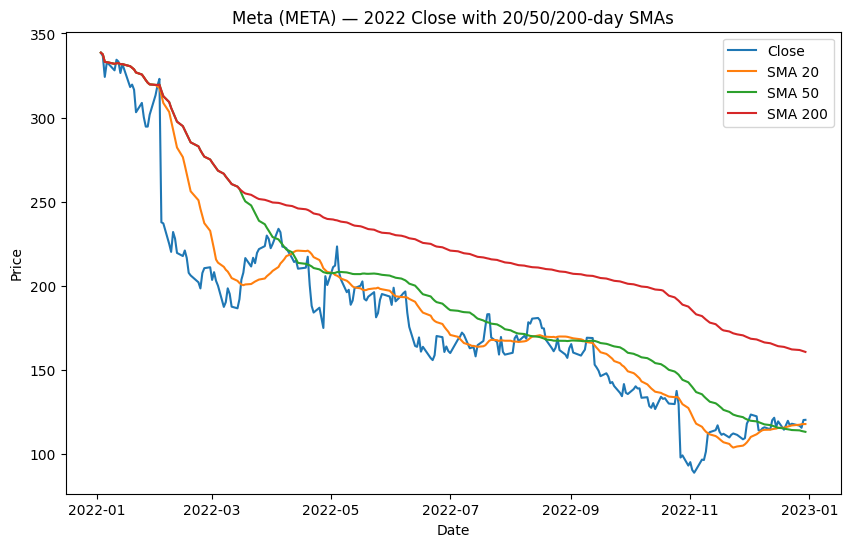

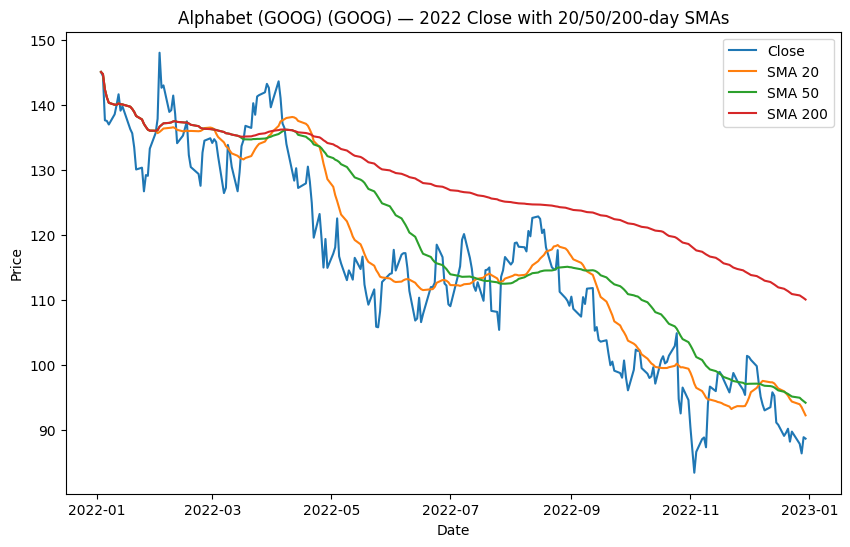

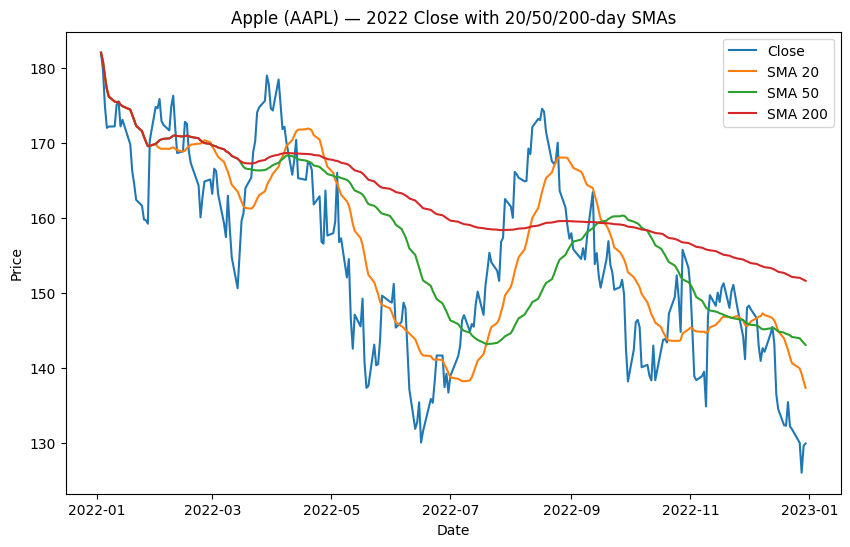

In [52]:
# Rolling averages (SMA 20/50/200) for 2022
# Tickers: AMZN, MSFT, META, GOOG, AAPL
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.width", 140)
pd.set_option("display.max_columns", 50)

tickers = ["AMZN","MSFT","META","GOOG","AAPL"]
name_map = {
    "AMZN":"Amazon","MSFT":"Microsoft","META":"Meta",
    "GOOG":"Alphabet (GOOG)","AAPL":"Apple"
}

# Download with padding before 2022 so early SMAs have enough lookback
start_dl = datetime.datetime(2021, 1, 1)
end_dl   = datetime.datetime(2022, 12, 31)

raw = yf.download(
    tickers,
    start=start_dl,
    end=end_dl,
    auto_adjust=False,      # be explicit to avoid version-default surprises
    progress=False,
    group_by="ticker"
)

# Build one tidy DataFrame
frames = []
for t in tickers:
    if t in raw:
        d = raw[t].reset_index()  # Date, Open, High, Low, Close, Adj Close, Volume
        d["Ticker"] = t
        d["Company"] = name_map.get(t, t)
        frames.append(d)

df = pd.concat(frames, ignore_index=True).sort_values(["Ticker","Date"]).reset_index(drop=True)
if not pd.api.types.is_datetime64_any_dtype(df["Date"]):
    df["Date"] = pd.to_datetime(df["Date"])

# Subset to 2022
start_2022 = datetime.datetime(2022, 1, 1)
end_2022   = datetime.datetime(2022, 12, 31)
df22 = df[(df["Date"] >= start_2022) & (df["Date"] <= end_2022)].copy()

# Compute 20/50/200-day SMAs per ticker on Close only
for w in [20, 50, 200]:
    df22[f"SMA_{w}"] = (
        df22.groupby("Ticker")["Close"]
            .transform(lambda s: s.rolling(window=w, min_periods=1).mean())
    )
# Plot each ticker
for t in tickers:
    sub = df22[df22["Ticker"] == t]
    if sub.empty:
        continue
    plt.figure()
    plt.plot(sub["Date"], sub["Close"], label="Close")
    plt.plot(sub["Date"], sub["SMA_20"], label="SMA 20")
    plt.plot(sub["Date"], sub["SMA_50"], label="SMA 50")
    plt.plot(sub["Date"], sub["SMA_200"], label="SMA 200")
    plt.title(f"{name_map.get(t, t)} ({t}) — 2022 Close with 20/50/200-day SMAs")
    plt.xlabel("Date"); plt.ylabel("Price")
    plt.legend(); plt.show()

### Bonus Question (Choose one out of these two):
##### 1. Among all publicly traded companies in the technology industry, identify which company has performed the best this year so far (up until today). To answer this question, you need to download the latest stock price data from sources like Yahoo Finance API.


* Use your creativity in this question to examine perhaps whether small cap vs. mid cap vs. large cap tech firms did better, or whether tech firms in a specific subindustry (e.g. hardware, semiconductor) did better.

* To expand your analysis to a broader set of technology firms, you may find a list of tech firms here: https://mergr.com/public-information-technology-companies
You could also use some other lists of public tech firms. 

##### 2. Among all publicly traded U.S. companies the airline industry, find out which company has performed the best this year so far (up until today). To answer this question, you need to download the latest stock price data from sources like Yahoo Finance API.

In [ ]:
# your code here
start = datetime.datetime(2025, 1, 1)
end = datetime.datetime(2025, 12, 31)



# Great Job!
